In [429]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [430]:
train = pd.read_csv('titanic_train.csv')

In [431]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [432]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [433]:
sns.set_style('whitegrid')

<AxesSubplot:>

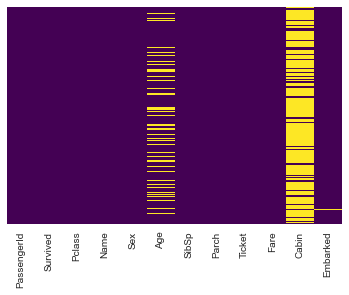

In [434]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

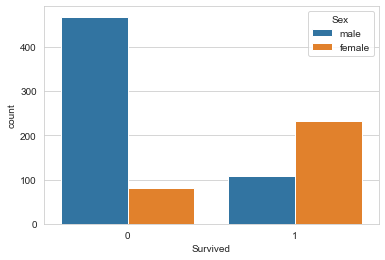

In [435]:
sns.countplot(x='Survived',hue='Sex', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

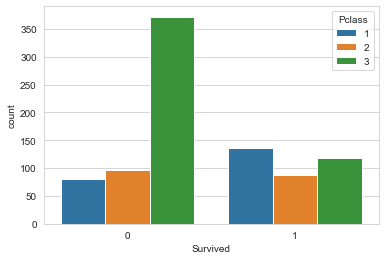

In [436]:
sns.countplot(x='Survived',hue='Pclass', data=train)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

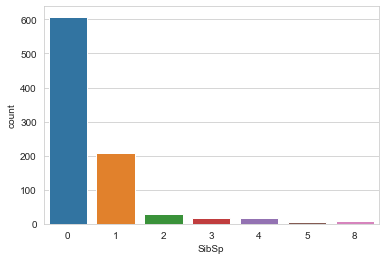

In [437]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

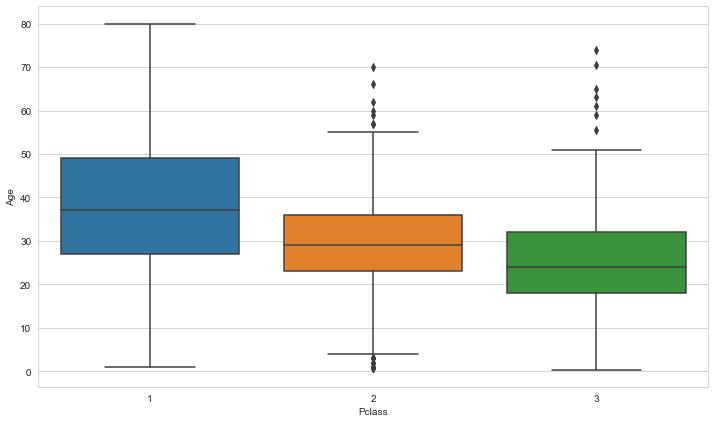

In [438]:
plt.figure(figsize=(12,7))

sns.boxplot(x='Pclass',y='Age',data=train)

In [439]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [440]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [441]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

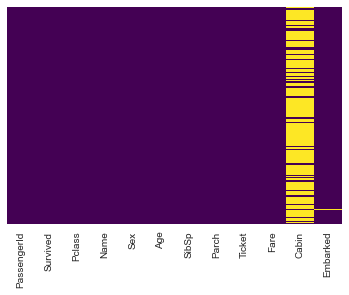

In [442]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [443]:
train.drop('Cabin',axis=1,inplace=True)

agora verificando se a coluna foi removida

In [444]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [445]:
train.dropna(inplace=True)

<AxesSubplot:>

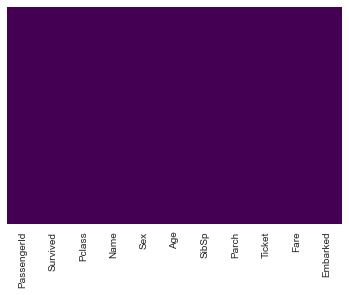

In [446]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [447]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [448]:
Sex = pd.get_dummies(train['Sex'],drop_first=True)

In [449]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

Agora vou adicionar oa valores das variaveis do Dataset

In [450]:
train = pd.concat([train,Sex,embark],axis=1)

In [451]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1,0,1


In [452]:
train.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [453]:
train.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.25,1,0,1


In [454]:
train.drop('Fare',axis=1,inplace=True)

Vamos gerar dividir o DataSet de treino e o DataSet de teste

In [455]:
X = train.drop(['Survived'],axis=1)

y = train['Survived']

In [456]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [457]:
y_train

807    0
651    1
2      1
690    1
196    0
      ..
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 622, dtype: int64

In [458]:
X_test

,Pclass,Age,SibSp,Parch,male,Q,S
511,3,25.0,0,0,1,0,1
613,3,25.0,0,0,1,1,0
615,2,24.0,1,2,0,0,1
337,1,41.0,0,0,0,0,0
718,3,25.0,0,0,1,1,0
...,...,...,...,...,...,...,...
792,3,25.0,8,2,0,0,1
828,3,25.0,0,0,1,1,0
732,2,29.0,0,0,1,0,1
669,1,37.0,1,0,0,0,1


In [459]:
from sklearn.linear_model import LogisticRegression

In [460]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [461]:
predictions = logmodel.predict(X_test)

In [462]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))



              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

[[149  14]
 [ 31  73]]


In [463]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

Agora vamos testar com arvore de descisão

In [464]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

In [465]:

dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))



              precision    recall  f1-score   support

           0       0.83      0.85      0.84       163
           1       0.76      0.73      0.75       104

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267

[[139  24]
 [ 28  76]]


In [466]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [467]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       163
           1       0.92      0.66      0.77       104

    accuracy                           0.85       267
   macro avg       0.87      0.81      0.83       267
weighted avg       0.86      0.85      0.84       267

[[157   6]
 [ 35  69]]


Agora vou utilizar o DataSet de teste para validar no Kaggle

In [468]:
test = pd.read_csv('titanic_test.csv')

In [469]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


<AxesSubplot:>

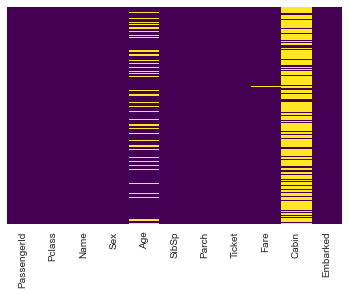

In [470]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

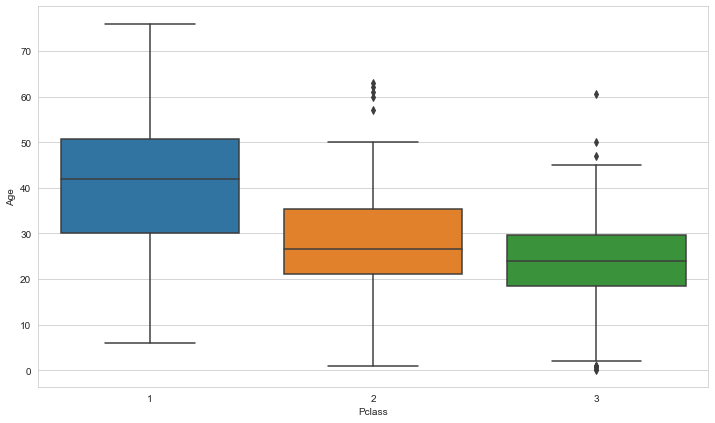

In [471]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=test)

In [472]:
def impute_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 25
        else:
            return 23
    else:
        return Age

In [473]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

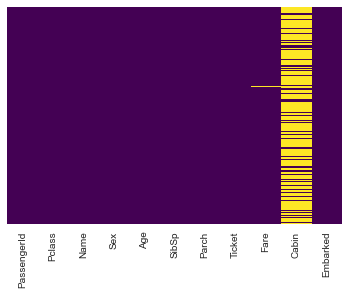

In [474]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [475]:

Sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
test = pd.concat([test,Sex,embark],axis=1)
test.drop('Cabin',axis=1,inplace=True)
test.drop('Fare',axis=1,inplace=True)
test.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [476]:
test.head(1)

,Pclass,Age,SibSp,Parch,male,Q,S
0,3,34.5,0,0,1,1,0


In [477]:
test.fillna(-1)

,Pclass,Age,SibSp,Parch,male,Q,S
0,3,34.5,0,0,1,1,0
1,3,47.0,1,0,0,0,1
2,2,62.0,0,0,1,1,0
3,3,27.0,0,0,1,0,1
4,3,22.0,1,1,0,0,1
...,...,...,...,...,...,...,...
413,3,25.0,0,0,1,0,1
414,1,39.0,0,0,0,0,0
415,3,38.5,0,0,1,0,1
416,3,25.0,0,0,1,0,1


In [502]:
#logmodel.fit(X,y)
#predictions = logmodel.predict(test)
dtree.fit(X, y)
predictions = dtree.predict(test)
#rfc.fit(X, y)
#predictions = rfc.predict(test)

In [503]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [532]:
test_ = pd.read_csv('titanic_test.csv')

In [538]:
#x = pd.Series(predictions,index=test_['PassengerId'],name='Survived')

x = pd.Series(p,index=test_['PassengerId'],name='Survived')

In [506]:
x.to_csv('submission.csv',index=True)

In [509]:
from keras.models import Sequential

from keras.layers import Dense,Dropout

from keras.wrappers.scikit_learn import KerasClassifier

from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold

In [521]:
import time

from datetime import timedelta

verbose = 0

In [510]:
classifier = Sequential()

classifier.add(Dense(activation="relu", input_dim=22, units=11, kernel_initializer="uniform"))

classifier.add(Dense(activation="relu", units=11, kernel_initializer="uniform"))

classifier.add(Dropout(0.5))

classifier.add(Dense(activation="relu", units=11, kernel_initializer="uniform"))

classifier.add(Dropout(0.5))

classifier.add(Dense(activation="relu", units=5, kernel_initializer="uniform"))

classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                253       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dropout (Dropout)           (None, 11)                0         
                                                                 
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dropout_1 (Dropout)         (None, 11)                0         
                                                                 
 dense_5 (Dense)             (None, 5)                 60        
                                                                 
 dense_6 (Dense)             (None, 1)                

In [511]:
y_test = y_test.values

y_train = y_train.values



scale = StandardScaler()

X_test = scale.fit_transform(X_test)

X_train = scale.fit_transform(X_train)

In [512]:
y_test

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [513]:
X_test

array([[ 0.82416338, -0.29407662, -0.45628514, ...,  0.70115627,
        -0.31426968,  0.625     ],
       [ 0.82416338, -0.29407662, -0.45628514, ...,  0.70115627,
         3.18198052, -1.6       ],
       [-0.39834564, -0.36618335,  0.41391581, ..., -1.42621559,
        -0.31426968,  0.625     ],
       ...,
       [-0.39834564, -0.00564971, -0.45628514, ...,  0.70115627,
        -0.31426968,  0.625     ],
       [-1.62085465,  0.57120411,  0.41391581, ..., -1.42621559,
        -0.31426968,  0.625     ],
       [ 0.82416338, -1.44778426,  2.1543177 , ..., -1.42621559,
        -0.31426968,  0.625     ]])

In [514]:

y_tensor = train['Survived'].values


x_tensor = train.drop(['Survived'],axis=1).values.astype(float)
scale = StandardScaler()
x_tensor = scale.fit_transform(x_tensor)



In [517]:
def create_model(optimizer='adam', init='uniform'):

    # create model

    if verbose: print("**Create model with optimizer: %s; init: %s" % (optimizer, init) )

    model = Sequential()

    model.add(Dense(16, input_dim=X.shape[1], kernel_initializer=init, activation='relu'))

    model.add(Dense(8, kernel_initializer=init, activation='relu'))

    model.add(Dense(4, kernel_initializer=init, activation='relu'))

    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))

    # Compile model

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [522]:
#model_pred = KerasClassifier(build_fn=create_model, optimizer=best_optimizer, init=best_init, epochs=best_epochs, batch_size=best_batch_size, verbose=verbose)
model_pred = KerasClassifier(build_fn=create_model, optimizer='adam', init='glorot_uniform', epochs=50, batch_size=5, verbose=verbose)
 #model_pred.fit(x_tensor, y_tensor)
model_pred.fit(X_train, y_train)

C:\Users\silvio.fonseca\AppData\Local\Temp\ipykernel_17492\181835189.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_pred = KerasClassifier(build_fn=create_model, optimizer='adam', init='glorot_uniform', epochs=50, batch_size=5, verbose=verbose)


In [524]:
# Read test data
test_df = pd.read_csv('titanic_test.csv',index_col='PassengerId')
#test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

test_df = train.drop(['Survived'],axis=1).values.astype(float)


In [535]:
test_df = scale.transform(test_df)
test_df.shape
test_df

array([[ 0.82520863, -0.54546224,  0.43135024, ...,  0.73534203,
        -0.30794088,  0.61679395],
       [-1.57221121,  0.67135835,  0.43135024, ..., -1.35991138,
        -0.30794088, -1.62128697],
       [ 0.82520863, -0.24125709, -0.47519908, ..., -1.35991138,
        -0.30794088,  0.61679395],
       ...,
       [ 0.82520863, -0.31730838,  0.43135024, ..., -1.35991138,
        -0.30794088,  0.61679395],
       [-1.57221121, -0.24125709, -0.47519908, ...,  0.73534203,
        -0.30794088, -1.62128697],
       [ 0.82520863,  0.21505063, -0.47519908, ...,  0.73534203,
         3.24737656, -1.62128697]])

In [531]:

#test = scale.transform(test)
#test.shape
#test

X_test = scale.transform(test)
X_test.shape
X_test



array([[-1.78173536, -2.18777618, -0.90599049, ...,  0.18081652,
        11.23751366, -5.2498584 ],
       [-1.78173536, -2.1154787 , -0.08415882, ..., -4.20927036,
        -1.40276847, -0.24085218],
       [-3.21864083, -2.02872173, -0.90599049, ...,  0.18081652,
        11.23751366, -5.2498584 ],
       ...,
       [-1.78173536, -2.16464098, -0.90599049, ...,  0.18081652,
        -1.40276847, -0.24085218],
       [-1.78173536, -2.24272226, -0.90599049, ...,  0.18081652,
        -1.40276847, -0.24085218],
       [-1.78173536, -2.24272226, -0.08415882, ...,  0.18081652,
        -1.40276847, -5.2498584 ]])

In [536]:

prediction = model_pred.predict(X_test)



In [537]:
p = prediction.reshape(prediction.shape[0])

p

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [529]:
print(classification_report(y_test,prediction))

print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

[[150  13]
 [ 32  72]]
